# Visualizing The Gender Gap in College Degrees

## Introduction

The [Department of Education Statistics](http://nces.ed.gov/programs/digest/2013menu_tables.asp) releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. You can download the dataset Randal compiled [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv). Here's a preview of the first few rows:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


Randal compiled this data set to explore the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics. This gap is reported on often in the news and not everyone agrees that there is a gap.

I'll explore how I can communicate the nuanced narrative of gender gap using effective data visualization. 
First of all, I will generate a standard matplotlib plot.

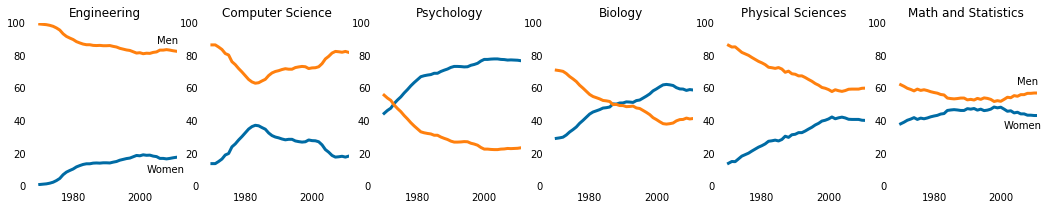

In [2]:
fig = plt.figure(figsize=(18, 3))

#color from the color blind 10 paletter used to represents the lines in the lines chart
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

#creates a 6 column 1 row subplots in the figure
for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

## Comparing across all degrees 
Because there are seventeen degrees that we need to generate line charts for, we'll use a subplot grid layout of 6 rows by 3 columns. We can then group the degrees into STEM, liberal arts, and other, in the following way:

1. `STEM = 'Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering'`
2. `Liberal arts = 'Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History'`
3. `Others = 'Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture'`

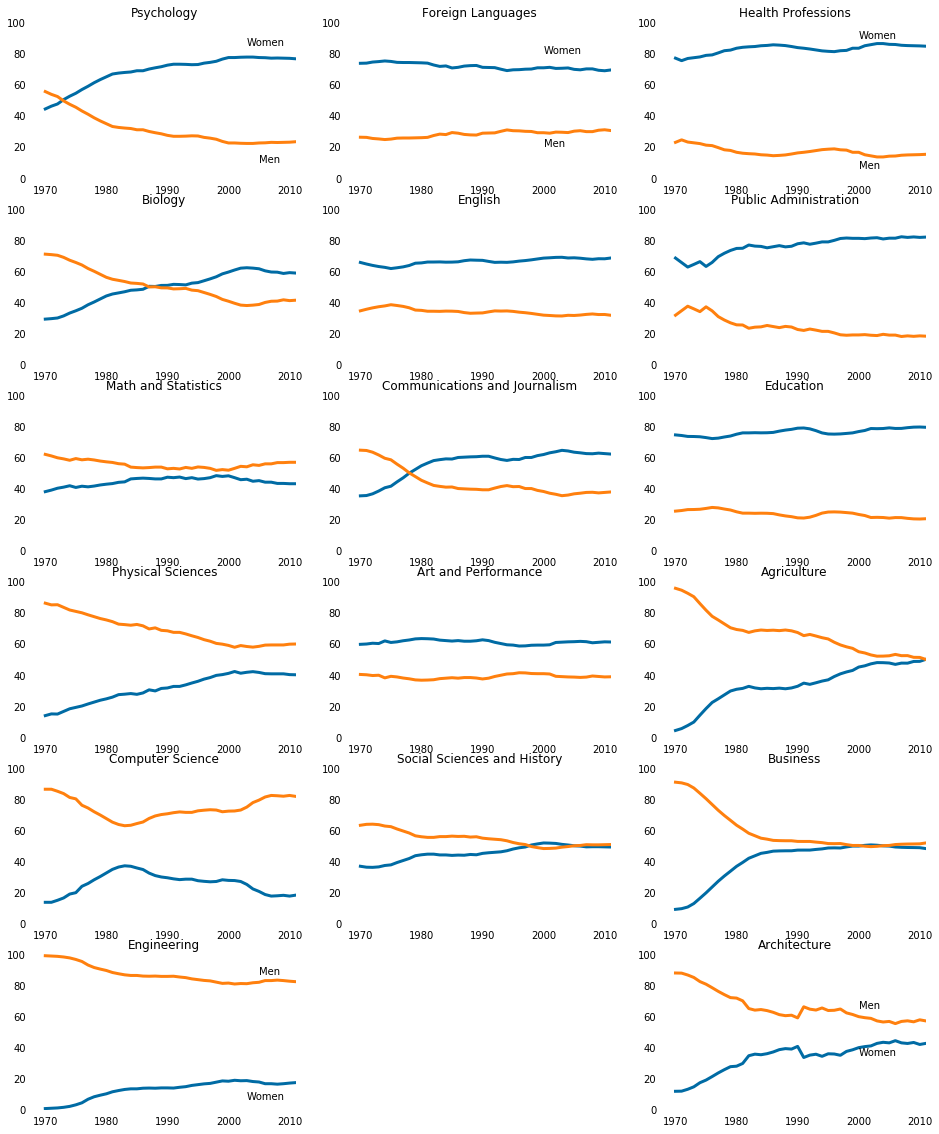

In [3]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']
fig = plt.figure(figsize = (16,20))

#creates 6 rows of subplots in the 1st column
for i in range(0,18,3):
    ax = fig.add_subplot(6,3,i+1)
    index = int(i/3)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[index])
    #hide the tick parameters
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    #add text annnotations at the first and last plots
    if index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    
    elif index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')

#creates 6 rows of subplots in the 2nd column
for i in range(1,15,3):
    ax = fig.add_subplot(6,3,i+1)
    index = int(i//3)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[index])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    if index == 0:
        ax.text(2000, 80, 'Women')
        ax.text(2000, 20, 'Men')

#creates 6 rows of subplots in the 3rd column
for i in range(2,18,3):
    ax = fig.add_subplot(6,3,i+1)
    index = int(i//3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[index]], c=cb_orange, label='Men', linewidth=3)
    #remove the line edges of the plots
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[index])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    if index == 0:
        ax.text(2000, 90, 'Women')
        ax.text(2000, 6, 'Men')
    
    elif index == 5:
        ax.text(2000, 65, 'Men')
        ax.text(2000, 35, 'Women')

plt.show()

## Hiding the x-axis labels

With seventeen line charts in one diagram, the non-data elements quickly clutter the field of view. The most immediate issue that sticks out is the titles of some line charts overlapping with the x-axis labels for the line chart above it. If I remove the titles for each line chart, the viewer won't know what degree each line chart refers to. Let's instead remove the x-axis labels for every line chart in a column except for the bottom most one

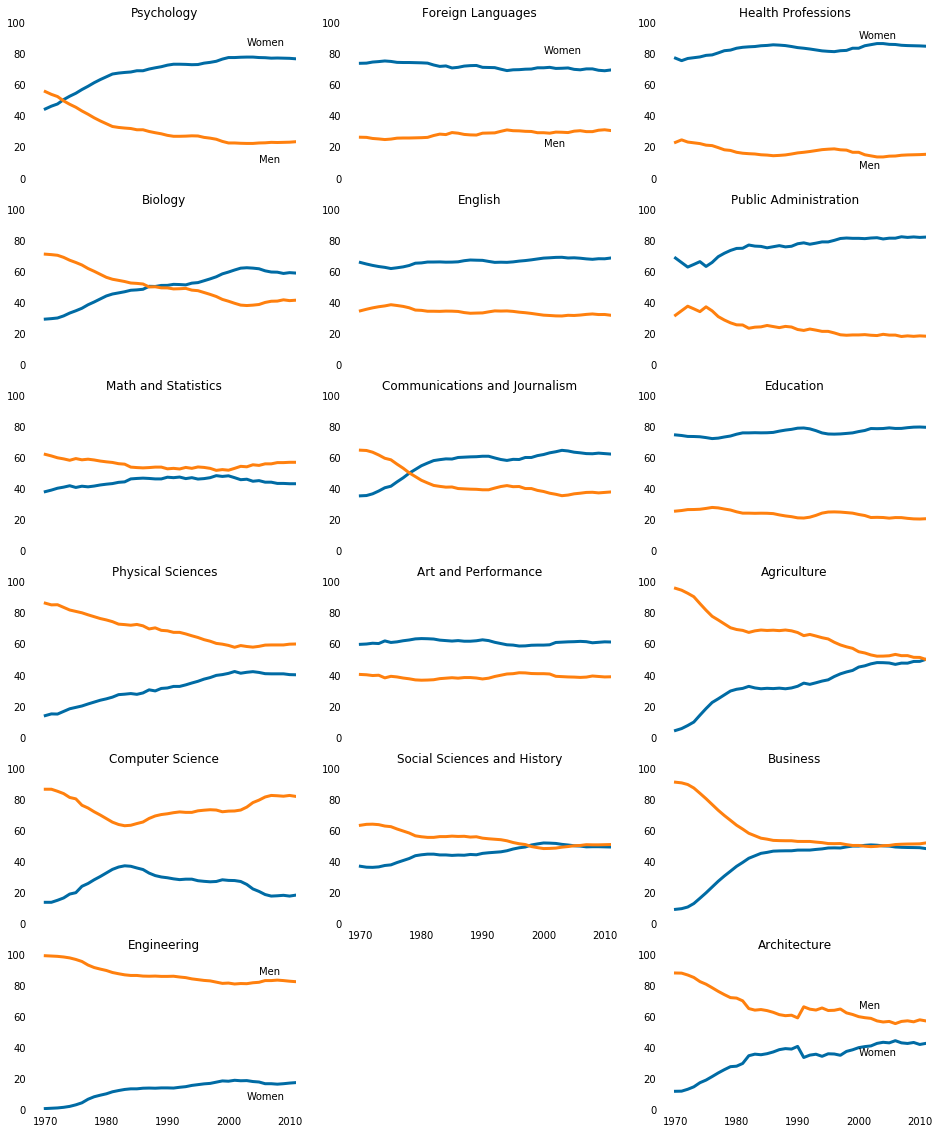

In [4]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']
fig = plt.figure(figsize = (16,20))

for i in range(0,18,3):
    ax = fig.add_subplot(6,3,i+1)
    index = int(i/3)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[index])
    #hides the x-axis labels
    ax.tick_params(bottom=False, top=False, left=False, right=False , labelbottom = False)
    
    if index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    
    elif index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
        #shows the x-axis labels only for the last plot
        ax.tick_params(labelbottom = True)
        
for i in range(1,15,3):
    ax = fig.add_subplot(6,3,i+1)
    index = int(i//3)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[index])
    ax.tick_params(bottom=False, top=False, left=False, right=False , labelbottom = False)
    
    if index == 0:
        ax.text(2000, 80, 'Women')
        ax.text(2000, 20, 'Men')
        
    if index == 4:
        ax.tick_params(labelbottom = True)

for i in range(2,18,3):
    ax = fig.add_subplot(6,3,i+1)
    index = int(i//3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[index])
    ax.tick_params(bottom=False, top=False, left=False, right=False , labelbottom = False)
    
    if index == 0:
        ax.text(2000, 90, 'Women')
        ax.text(2000, 6, 'Men')
    
    elif index == 5:
        ax.text(2000, 65, 'Men')
        ax.text(2000, 35, 'Women')
        ax.tick_params(labelbottom = True)

## Setting y-axis labels

In the vein of reducing cluttering, let's also simplify the y-axis labels. Currently, all seventeen plots have six y-axis labels and even though they are consistent across the plots, they still add to the visual clutter. By keeping just the starting and ending labels (0 and 100), we can keep some of the benefits of having the y-axis labels to begin with.

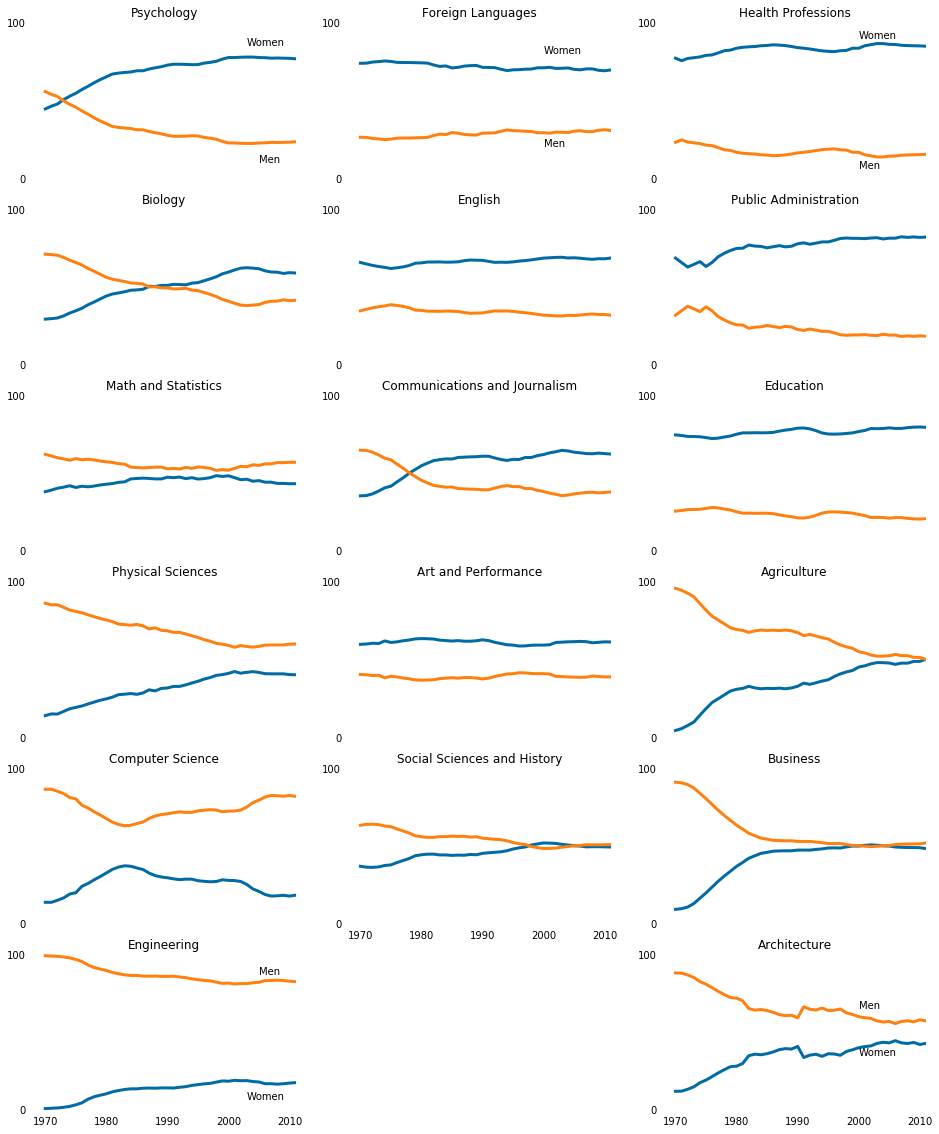

In [5]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']
fig = plt.figure(figsize = (16,20))

for i in range(0,18,3):
    ax = fig.add_subplot(6,3,i+1)
    index = int(i/3)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[index])
    ax.tick_params(bottom=False, top=False, left=False, right=False , labelbottom = False)
    #set the values/labels to appear on the y-axis
    ax.set_yticks([0,100])
    if index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    
    elif index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
        ax.tick_params(labelbottom = True)
        
for i in range(1,15,3):
    ax = fig.add_subplot(6,3,i+1)
    index = int(i//3)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[index])
    ax.tick_params(bottom=False, top=False, left=False, right=False , labelbottom = False)
    ax.set_yticks([0,100])
    if index == 0:
        ax.text(2000, 80, 'Women')
        ax.text(2000, 20, 'Men')
        
    if index == 4:
        ax.tick_params(labelbottom = True)

for i in range(2,18,3):
    ax = fig.add_subplot(6,3,i+1)
    index = int(i//3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[index])
    ax.tick_params(bottom=False, top=False, left=False, right=False , labelbottom = False)
    ax.set_yticks([0,100])
    if index == 0:
        ax.text(2000, 90, 'Women')
        ax.text(2000, 6, 'Men')
    
    elif index == 5:
        ax.text(2000, 65, 'Men')
        ax.text(2000, 35, 'Women')
        ax.tick_params(labelbottom = True)
        
plt.show()

## Adding a horizontal Line

While removing most of the y-axis labels definitely reduced clutter, it also made it hard to understand which degrees have close to 50-50 gender breakdown. While keeping all of the y-axis labels would have made it easier, I can actually do one better and use a horizontal line across all of the line charts where the y-axis label 50 would have been.

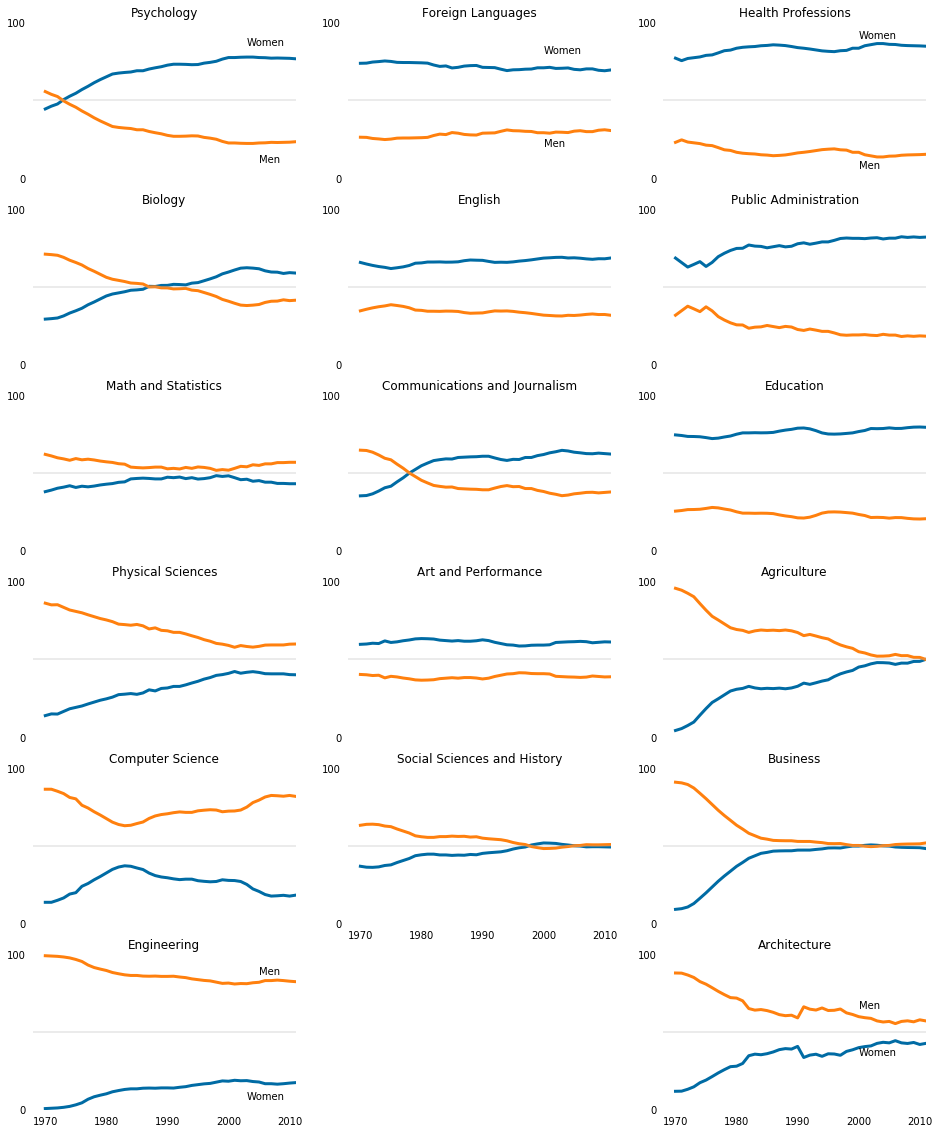

In [6]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']
fig = plt.figure(figsize = (16,20))

for i in range(0,18,3):
    ax = fig.add_subplot(6,3,i+1)
    index = int(i/3)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[index])
    ax.tick_params(bottom=False, top=False, left=False, right=False , labelbottom = False)
    ax.set_yticks([0,100])
    #adds an horizontal line at the 50 mark on the yaxis with 0.3 out of 1 transperancy and the grey color in the color blind 10 pallettte
    ax.axhline(50, c = (171/255,171/255,171/255), alpha = 0.3)
    if index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    
    elif index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
        ax.tick_params(labelbottom = True)
        
for i in range(1,15,3):
    ax = fig.add_subplot(6,3,i+1)
    index = int(i//3)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[index])
    ax.tick_params(bottom=False, top=False, left=False, right=False , labelbottom = False)
    ax.set_yticks([0,100])
    ax.axhline(50, c = (171/255,171/255,171/255), alpha = 0.3)
    if index == 0:
        ax.text(2000, 80, 'Women')
        ax.text(2000, 20, 'Men')
    
    if index == 4:
        ax.tick_params(labelbottom = True)

for i in range(2,18,3):
    ax = fig.add_subplot(6,3,i+1)
    index = int(i//3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[index])
    ax.tick_params(bottom=False, top=False, left=False, right=False , labelbottom = False)
    ax.set_yticks([0,100])
    ax.axhline(50, c = (171/255,171/255,171/255), alpha = 0.3)
    if index == 0:
        ax.text(2000, 90, 'Women')
        ax.text(2000, 6, 'Men')
    
    elif index == 5:
        ax.text(2000, 65, 'Men')
        ax.text(2000, 35, 'Women')
        ax.tick_params(labelbottom = True)
        
plt.show()

## Exporting as a .png file

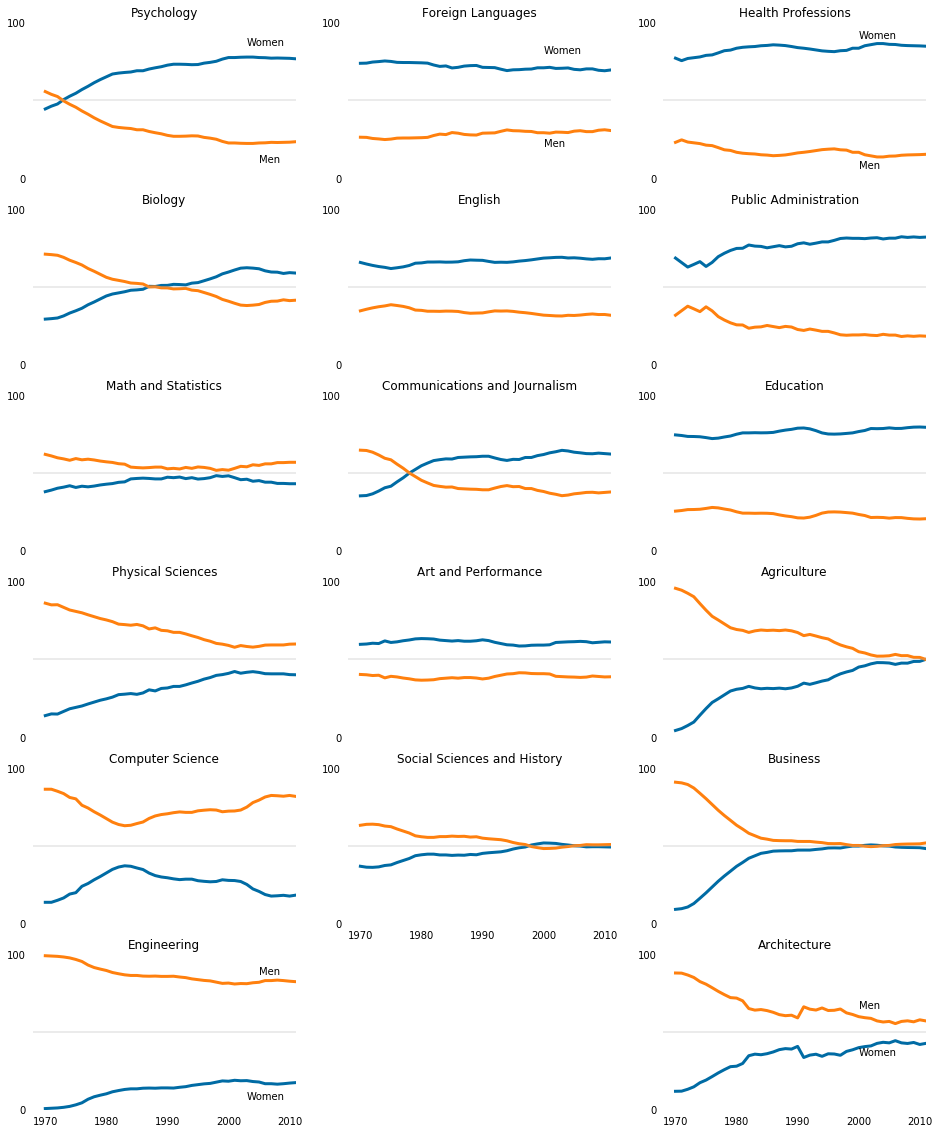

In [7]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']
fig = plt.figure(figsize = (16,20))

for i in range(0,18,3):
    ax = fig.add_subplot(6,3,i+1)
    index = int(i/3)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[index])
    ax.tick_params(bottom=False, top=False, left=False, right=False , labelbottom = False)
    ax.set_yticks([0,100])
    ax.axhline(50, c = (171/255,171/255,171/255), alpha = 0.3)
    if index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    
    elif index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
        ax.tick_params(labelbottom = True)
        
for i in range(1,15,3):
    ax = fig.add_subplot(6,3,i+1)
    index = int(i//3)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[index])
    ax.tick_params(bottom=False, top=False, left=False, right=False , labelbottom = False)
    ax.set_yticks([0,100])
    ax.axhline(50, c = (171/255,171/255,171/255), alpha = 0.3)
    if index == 0:
        ax.text(2000, 80, 'Women')
        ax.text(2000, 20, 'Men')
    
    if index == 4:
        ax.tick_params(labelbottom = True)

for i in range(2,18,3):
    ax = fig.add_subplot(6,3,i+1)
    index = int(i//3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[index])
    ax.tick_params(bottom=False, top=False, left=False, right=False , labelbottom = False)
    ax.set_yticks([0,100])
    ax.axhline(50, c = (171/255,171/255,171/255), alpha = 0.3)
    if index == 0:
        ax.text(2000, 90, 'Women')
        ax.text(2000, 6, 'Men')
    
    elif index == 5:
        ax.text(2000, 65, 'Men')
        ax.text(2000, 35, 'Women')
        ax.tick_params(labelbottom = True)

        
#exporting the file as a .png file
fig.savefig('gender_degrees.png')
plt.show()